# Google Trends Regression Exercise
Tony Nguyen

CPSC 222 01

12/7/2022

Data Assignment 7

I attempted the bonus

### Data Loading and Cleaning
This dataset contains information about the interest over time between two keywords *Gonzaga University* and *Admission* in the United States over the past five years.

A definition of *Interest Over Time* from Google Trends:
> Numbers represent search interest relative to the highest point on the chart for the given region and time. A value of 100 is the peak popularity for the term. A value of 50 means that the term is half as popular. A score of 0 means there was not enough data for this term.

The attributes of this dataset include:
* `Week`: Weekday, also the index of this dataset
* `Gonzaga University: (United States)`
* `Admission: (United States)`

In [40]:
import pandas as pd

df = pd.read_csv("multiTimeline.csv", header=1, index_col=0)
df

,Gonzaga University: (United States),Admission: (United States)
Week,,
2017-12-10,2,14
2017-12-17,2,14
2017-12-24,1,10
2017-12-31,2,11
2018-01-07,2,13
...,...,...
2022-10-30,2,12
2022-11-06,3,10
2022-11-13,2,11


I divide the dataset into two groups
* `x`: Admission
* `y`: Gonzaga University

In [41]:
x = df["Admission: (United States)"]
y = df["Gonzaga University: (United States)"]

### Split the Model to for Training and Testing group
* Preserving 25% of the data for testing

In [42]:
from sklearn.model_selection import train_test_split

X = x.to_frame()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

### Build the Linear Regression Model

In [43]:
from sklearn.linear_model import LinearRegression

lin_req = LinearRegression()
lin_req.fit(X_train, y_train)

m = lin_req.coef_[0]
b = lin_req.intercept_
print("m:", m)
print("b:", b)

m: 0.35497659271320975
b: -1.3950742926928545


In [44]:
from scipy import stats
x, y = stats.pearsonr(X_train["Admission: (United States)"], y_train)
print("Correlation coefficients:", x)

Correlation coefficients: 0.1946645831007925


So, the linear euqation is $y = 0.35x - 1.4$

The correlation coefficient is 0.1947

### Plot the fit line

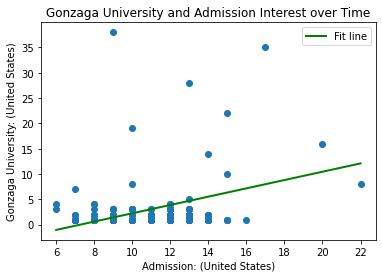

In [45]:
import matplotlib.pyplot as plt

x_train = X_train.iloc[:, 0]

plt.figure()
plt.scatter(x_train, y_train)
plt.plot([x_train.min(), x_train.max()], [m * y_train.min() + b, m * y_train.max() + b], lw=2, label="Fit line", color="green")
plt.xlabel("Admission: (United States)")
plt.ylabel("Gonzaga University: (United States)")
plt.title("Gonzaga University and Admission Interest over Time")
plt.legend()
plt.show()

### Closing Thought
* After testing several keywords, which includes *"ncaa", "Blackboard", "Spokane"* I find that *Admission* results in the highest correlation coefficient of 0.1947
* I still cannot find one that has a coefficient that is greater than 0.5 though :(